# Dataset Summary

- **Dataset Name**: New York Taxi Trip enriched by Mathematica
- **Source**: Kaggle
- **Domain**: Transportation
- **Target Variable**: `tripDuration` (regression)
- **Number of Features**: 24
- **Number of Records**: ~1.05 million
- **Problem Type**: Regression
- **Dataset Link**: [Kaggle Dataset Link](https://www.kaggle.com/datasets/wol4aravio/ny-taxi-trip-duration-enriched-by-mathematica)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kainat5008/ML-Assignment1/blob/main/Assignment1.ipynb)

In [32]:
!pip install gdown

In [33]:

import gdown

file_id = '1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD'
file_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'NY_Taxi_Rich.csv'
gdown.download(file_url, output, quiet=False)

# Load the dataset
import pandas as pd
df = pd.read_csv(output)

# Display the first 5 rows
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD
From (redirected): https://drive.google.com/uc?id=1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD&confirm=t&uuid=c3555ef0-93f3-4340-9ec4-68a5e979652b
To: /content/NY_Taxi_Rich.csv
100%|██████████| 400M/400M [00:02<00:00, 156MB/s]


          id  vendorId  passengerCount  year  month  day  hour  minute  \
0  id2875421         2               1  2016      3   14    17      24   
1  id2377394         1               1  2016      6   12     0      43   
2  id3858529         2               1  2016      1   19    11      35   
3  id3504673         2               1  2016      4    6    19      32   
4  id2181028         2               1  2016      3   26    13      30   

   second  season  ... snow startLatitude  startLongitude  endLatitude  \
0      55  Spring  ...    0     40.767937      -73.982155    40.765602   
1      35  Summer  ...    0     40.738564      -73.980415    40.731152   
2      24  Winter  ...    0     40.763939      -73.979027    40.710087   
3      31  Spring  ...    0     40.719971      -74.010040    40.706718   
4      55  Spring  ...    0     40.793209      -73.973053    40.782520   

   endLongitude  flag  drivingDistance  drivingTime  geoDistance tripDuration  
0    -73.964630     N         

In [34]:
# Basic information
print("Number of records:", df.shape[0])
print("Number of features:", df.shape[1])
print("\nData types:")
print(df.dtypes)

# Summary statistics for numeric features
print("\nSummary statistics:")
print(df.describe())

Number of records: 2083778
Number of features: 24

Data types:
id                  object
vendorId             int64
passengerCount       int64
year                 int64
month                int64
day                  int64
hour                 int64
minute               int64
second               int64
season              object
dayName             object
dayPeriod           object
temperature        float64
rain                 int64
snow                 int64
startLatitude      float64
startLongitude     float64
endLatitude        float64
endLongitude       float64
flag                object
drivingDistance    float64
drivingTime        float64
geoDistance        float64
tripDuration         int64
dtype: object

Summary statistics:
           vendorId  passengerCount       year         month           day  \
count  2.083778e+06    2.083778e+06  2083778.0  2.083778e+06  2.083778e+06   
mean   1.534930e+00    1.663700e+00     2016.0  3.518334e+00  1.549900e+01   
std    4.987785e-01 

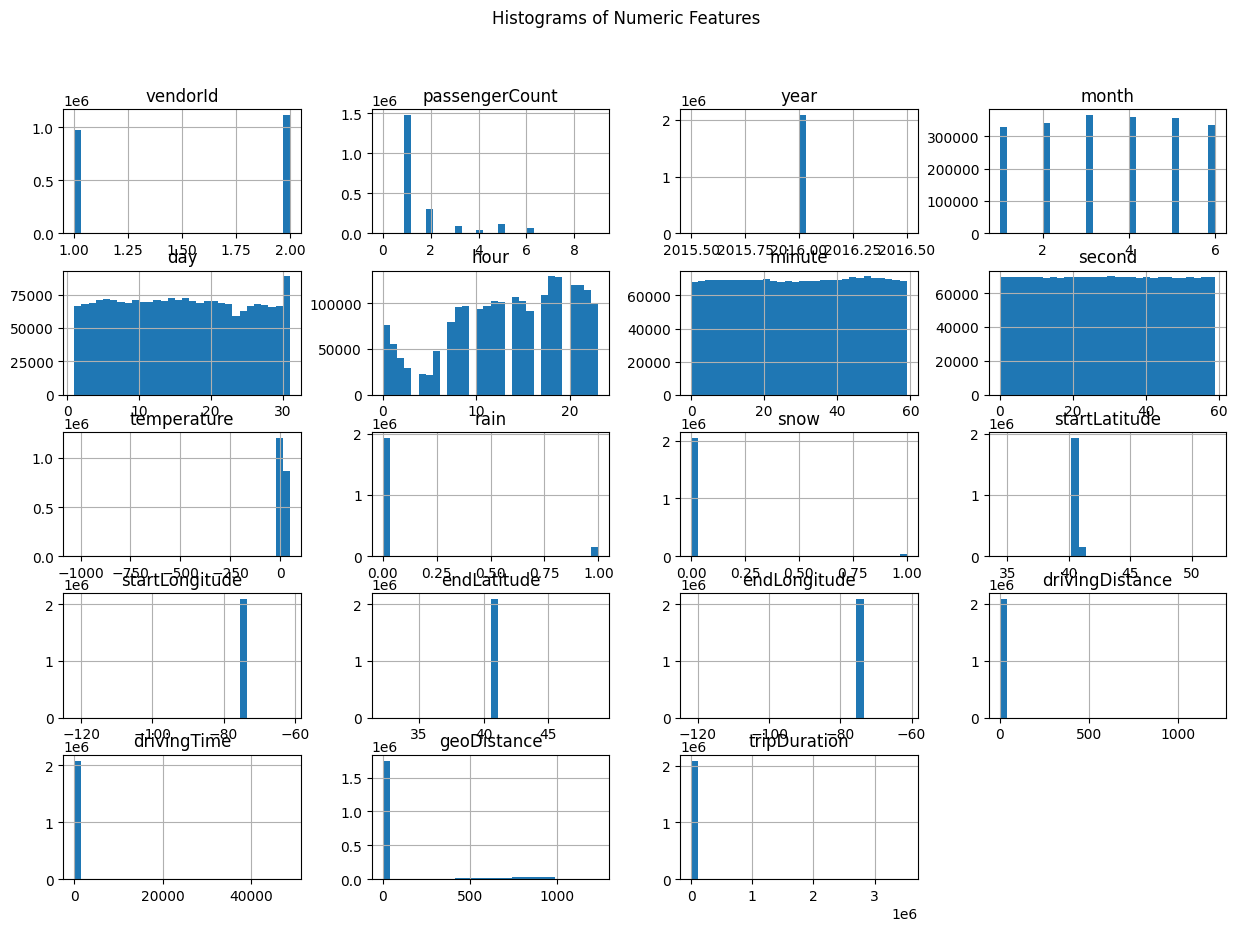

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.show()

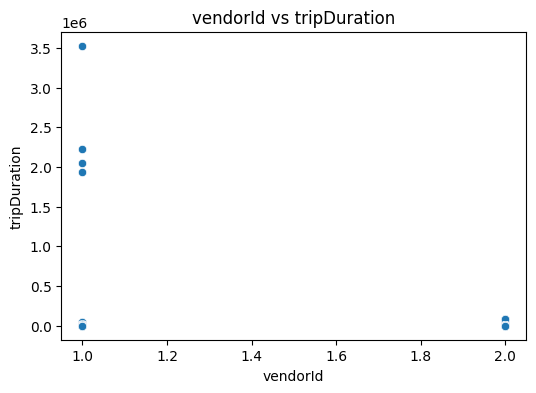

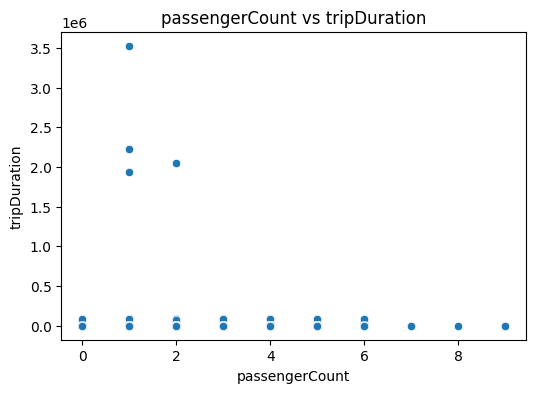

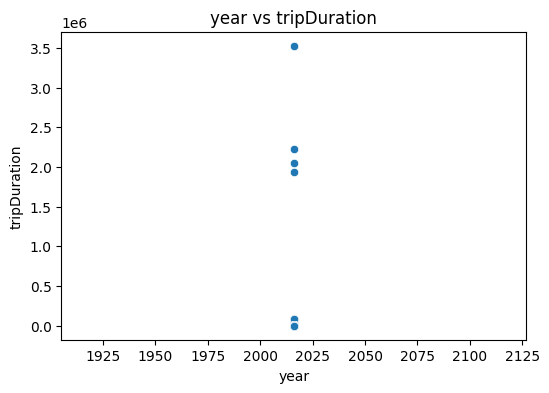

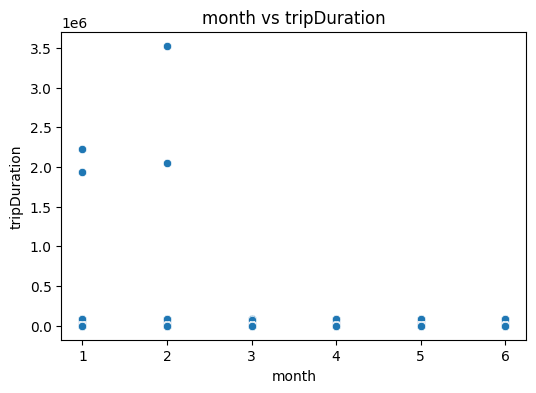

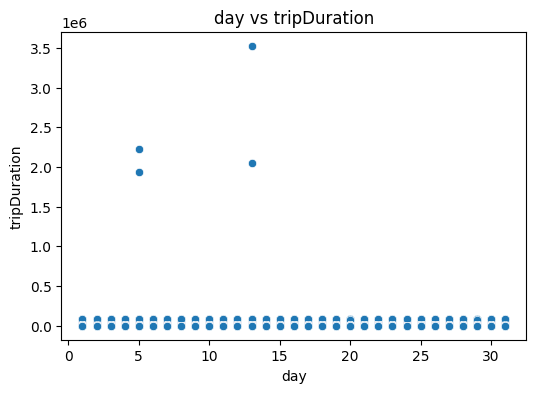

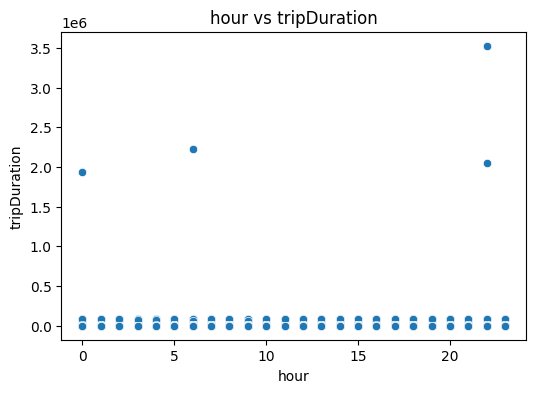

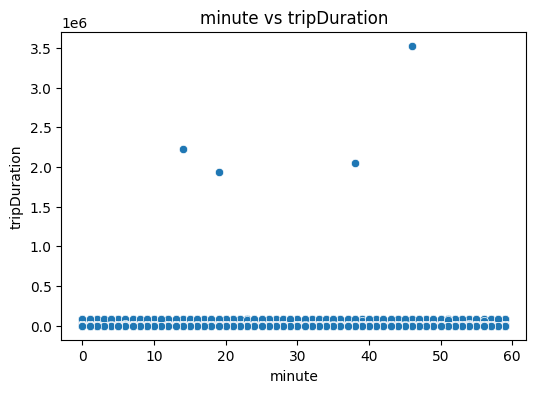

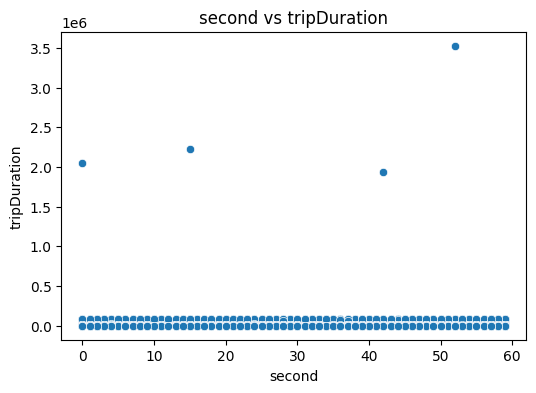

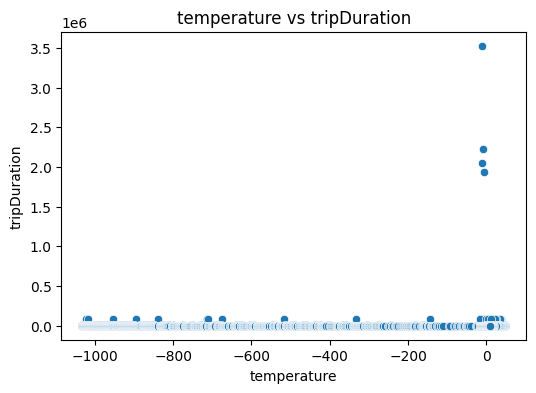

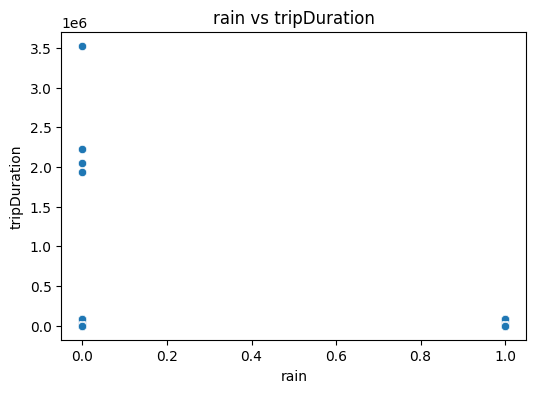

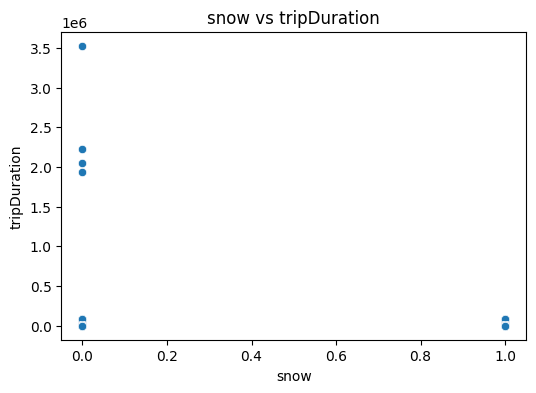

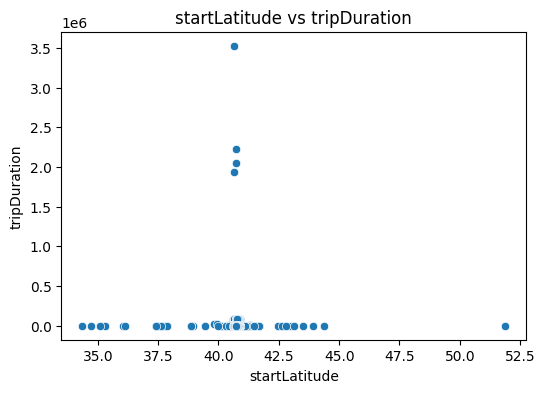

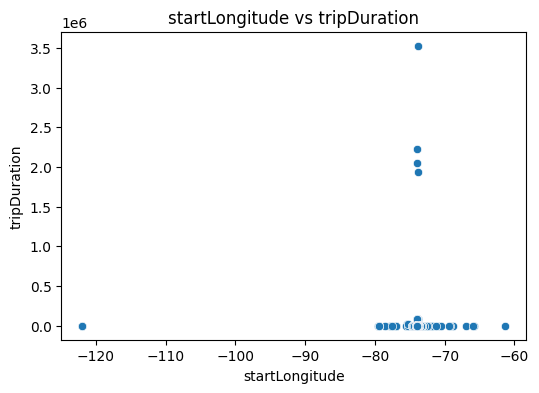

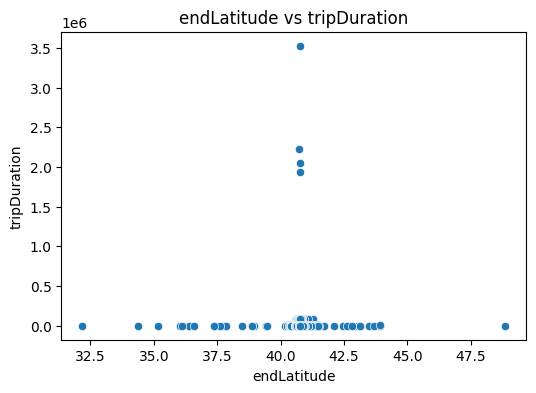

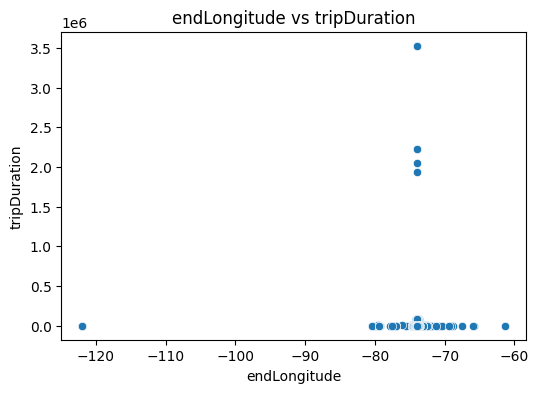

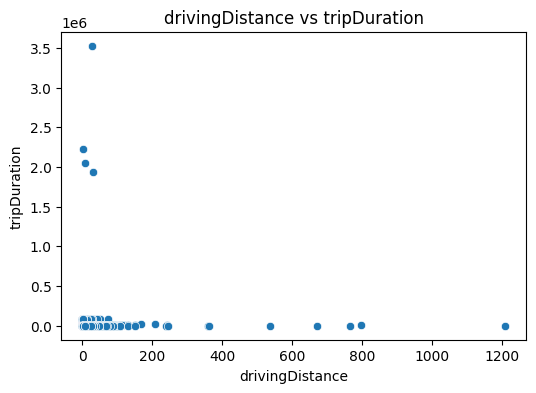

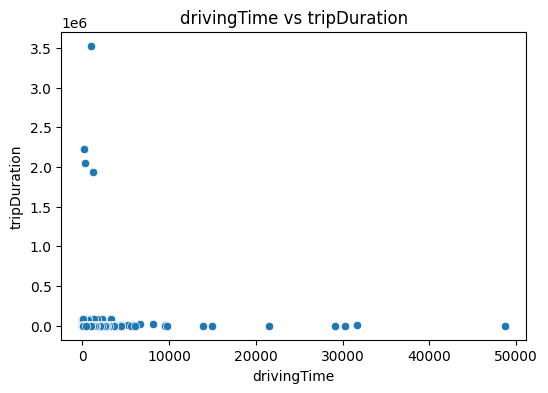

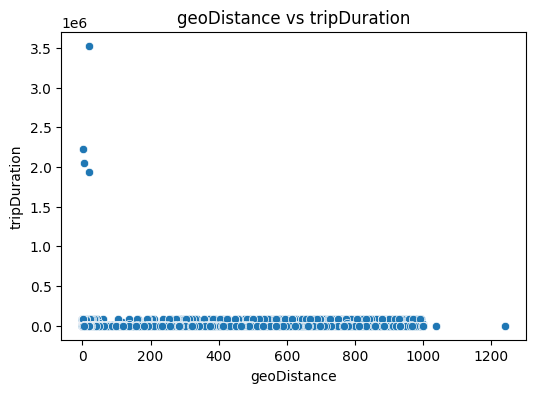

In [36]:
# Scatter plot for numeric features vs target variable
target_variable = 'tripDuration'  # Replace with your target variable
for feature in numeric_features:
    if feature != target_variable:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[feature], y=df[target_variable])
        plt.title(f"{feature} vs {target_variable}")
        plt.show()

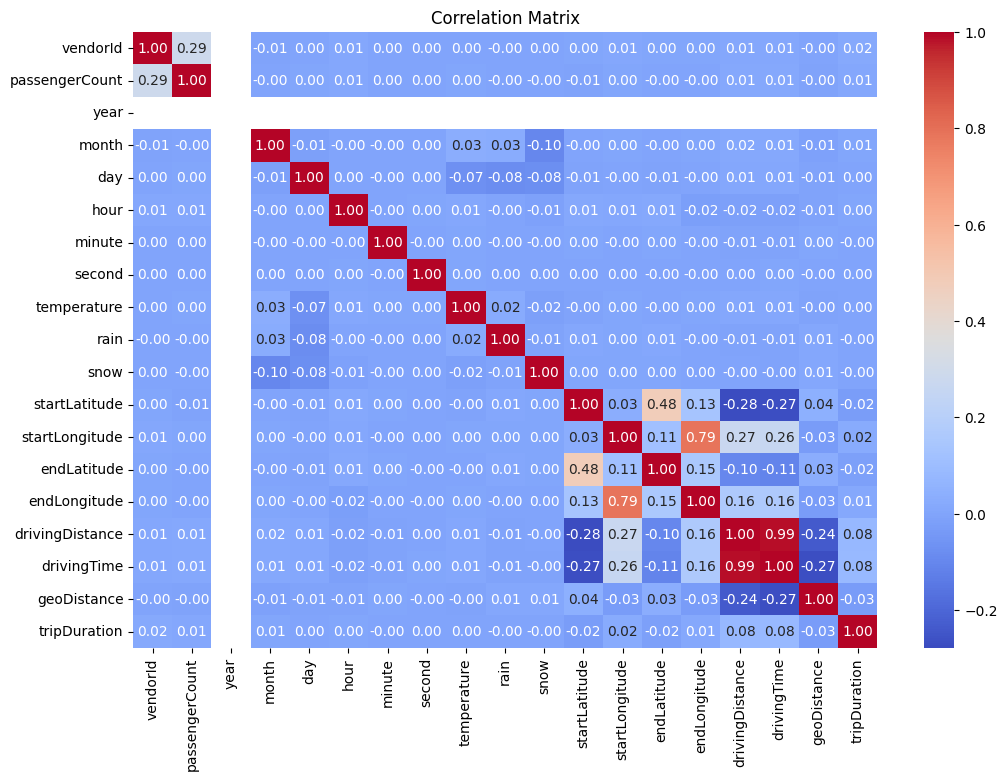

In [37]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

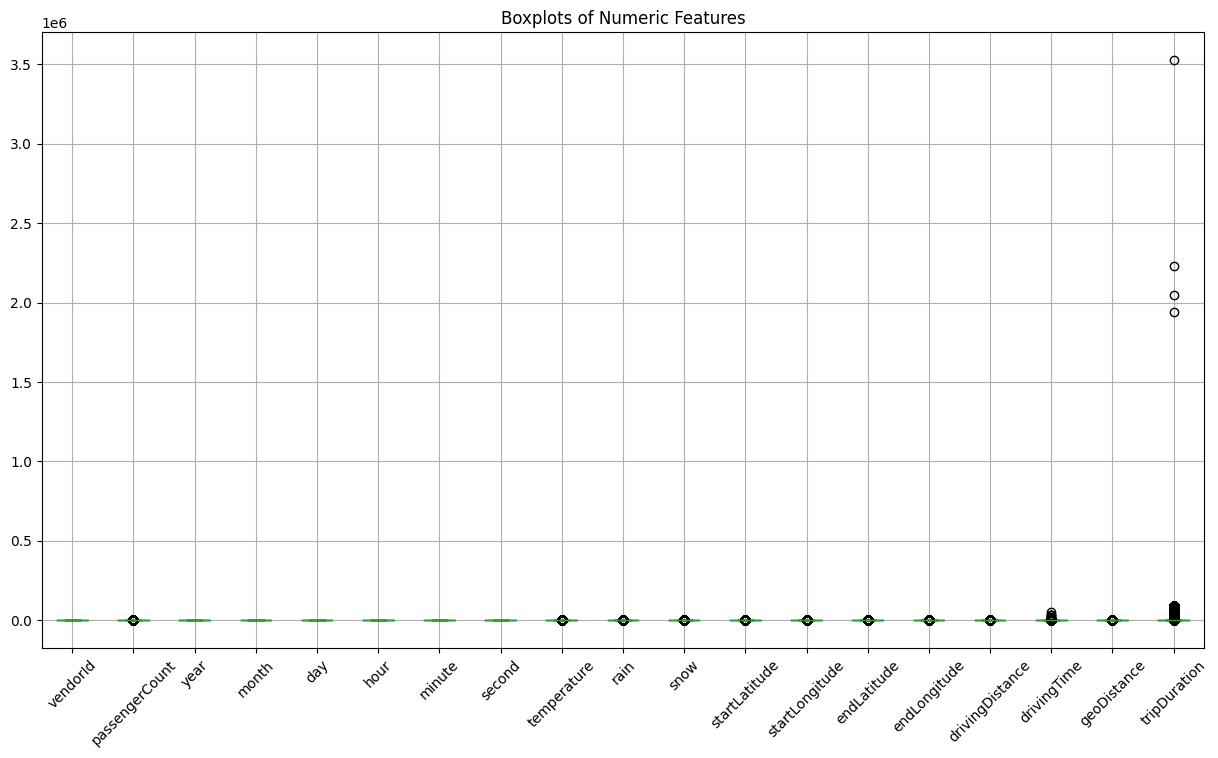

In [38]:
# Boxplots for numeric features
plt.figure(figsize=(15, 8))
df[numeric_features].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values per column:
id                    0
vendorId              0
passengerCount        0
year                  0
month                 0
day                   0
hour                  0
minute                0
second                0
season                0
dayName               0
dayPeriod             0
temperature           0
rain                  0
snow                  0
startLatitude         0
startLongitude        0
endLatitude           0
endLongitude          0
flag                  0
drivingDistance    4847
drivingTime        1963
geoDistance           0
tripDuration          0
dtype: int64

Missing values after handling:
id                 0
vendorId           0
passengerCount     0
year               0
month              0
day                0
hour               0
minute             0
second             0
season             0
dayName            0
dayPeriod          0
temperature        0
rain               0
snow               0
startLatitude      0
startLongitude  

In [40]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Detect outliers in numeric features
for feature in numeric_features:
    outliers = detect_outliers(df[feature])
    print(f"Outliers in {feature}: {len(outliers)}")

Outliers in vendorId: 0
Outliers in passengerCount: 220781
Outliers in year: 0
Outliers in month: 0
Outliers in day: 0
Outliers in hour: 0
Outliers in minute: 0
Outliers in second: 0
Outliers in temperature: 16183
Outliers in rain: 153328
Outliers in snow: 36472
Outliers in startLatitude: 75149
Outliers in startLongitude: 120044
Outliers in endLatitude: 102833
Outliers in endLongitude: 111167
Outliers in drivingDistance: 214567
Outliers in drivingTime: 182267
Outliers in geoDistance: 384252
Outliers in tripDuration: 67219


Correlation with target variable:
tripDuration       1.000000e+00
drivingTime        8.120941e-02
drivingDistance    7.907160e-02
startLongitude     2.194461e-02
vendorId           1.690870e-02
endLongitude       1.214643e-02
passengerCount     7.152989e-03
month              5.363422e-03
hour               3.045989e-03
day                5.588757e-04
temperature        1.097306e-05
second             4.260868e-07
rain              -4.204945e-06
snow              -1.694742e-03
minute            -1.969620e-03
endLatitude       -1.724332e-02
startLatitude     -2.498957e-02
geoDistance       -3.358913e-02
year                        NaN
Name: tripDuration, dtype: float64


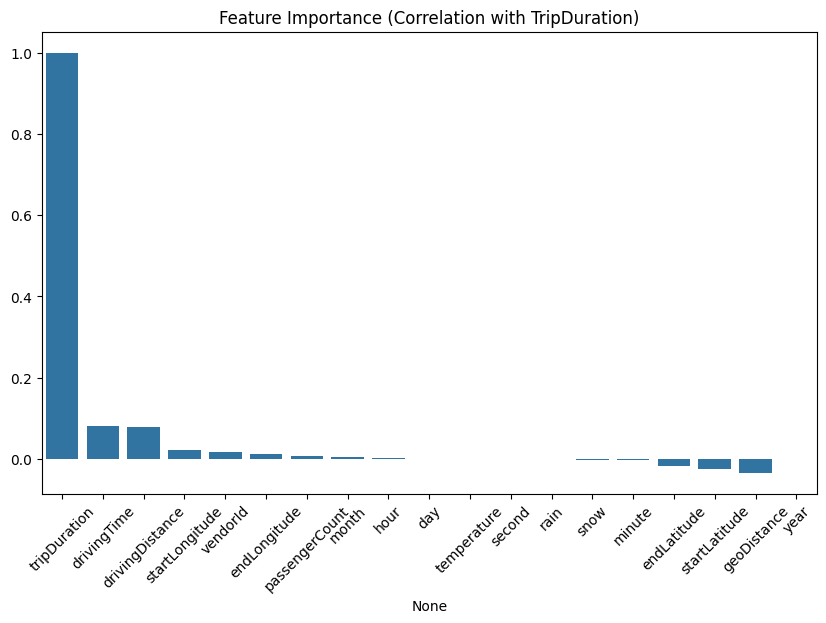

In [41]:
# Correlation with target variable
correlation_with_target = df[numeric_features].corr()[target_variable].sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title("Feature Importance (Correlation with TripDuration)")
plt.xticks(rotation=45)
plt.show()

In [43]:
import pandas as pd
import gdown

file_id = '1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD'
file_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'NY_Taxi_Rich.csv'
gdown.download(file_url, output, quiet=False)

# Load the dataset
import pandas as pd
df = pd.read_csv(output)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for categorical variables with multiple categories
categorical_features = ['season', 'dayName']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Label Encoding for binary categorical variables
df['flag'] = df['flag'].map({'Y': 1, 'N': 0})  # Convert 'Y' -> 1 and 'N' -> 0

print("Categorical features encoded successfully!")


Downloading...
From (original): https://drive.google.com/uc?id=1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD
From (redirected): https://drive.google.com/uc?id=1-kupu4E9ObvD3zN_5AEaP8jArUVgH8PD&confirm=t&uuid=af973e0f-b92c-44f3-9f56-5b4458901c59
To: /content/NY_Taxi_Rich.csv
100%|██████████| 400M/400M [00:06<00:00, 66.6MB/s]


Categorical features encoded successfully!


In [45]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
print("Numeric features scaled successfully!")


Numeric features scaled successfully!


In [46]:
df['trip_speed'] = df['drivingDistance'] / df['drivingTime']
df['trip_speed'].fillna(0, inplace=True)  # Handle NaN values


<ipython-input-46-7be44491d4fc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_speed'].fillna(0, inplace=True)  # Handle NaN values


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define columns
num_features = ['passengerCount', 'drivingDistance', 'drivingTime']
cat_features = ['season', 'dayName']

# Create transformations
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a full preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

print("Preprocessing pipeline created successfully!")

from google.colab import drive


# Use drive.mount instead of drive._mount
drive.mount('/content/drive')

# Save the preprocessed dataset to your Google Drive
# Assuming 'df_preprocessed' is your preprocessed DataFrame
# df_preprocessed.to_csv('/content/drive/MyDrive/preprocessed_dataset.csv', index=False) # Save to a specific folder in your Drive

print("Preprocessed dataset saved to Google Drive!")






Preprocessing pipeline created successfully!
Mounted at /content/drive
Preprocessed dataset saved to Google Drive!


In [54]:
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns.tolist())


from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Now split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Categorical variables encoded and data split successfully.")



from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['tripDuration'])  # Drop target column
y = df['tripDuration']  # Target variable


# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")



NameError: name 'X' is not defined

In [55]:
import numpy as np

# Convert infinite values to NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

from sklearn.impute import SimpleImputer
import pandas as pd

# Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy="mean")

# Fit and transform X_train
X_train_no_nan = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform X_test using the same imputer
X_test_no_nan = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("Remaining NaN values in X_train:", X_train_no_nan.isnull().sum().sum())  # Should print 0
print("Remaining Inf values in X_train:", np.isinf(X_train_no_nan).sum().sum())  # Should print 0


import numpy as np

# Check for missing values (NaN)
missing_values = X_train.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Check for infinite values
inf_values = np.isinf(X_train).sum()
print("Infinite values per column:\n", inf_values[inf_values > 0])

from sklearn.impute import SimpleImputer

# Replace NaN values with mean of the respective column
imputer = SimpleImputer(strategy="mean")
X_train_no_nan = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_no_nan = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Replace infinite values with the maximum finite value in that column
X_train_no_nan.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert inf to NaN
X_train_no_nan.fillna(X_train_no_nan.max(), inplace=True)  # Replace NaNs with max

X_test_no_nan.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_no_nan.fillna(X_test_no_nan.max(), inplace=True)

print("Remaining NaN values:", X_train_no_nan.isnull().sum().sum())  # Should print 0
print("Remaining Inf values:", np.isinf(X_train_no_nan).sum().sum())  # Should print 0


# Identify all categorical columns again
categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns.tolist())

# Apply One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check for any remaining non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns after encoding:", non_numeric_columns.tolist())  # This should be an empty list

if non_numeric_columns.empty:
    print("✅ All columns are numeric!")
else:
    print("⚠️ There are still non-numeric columns that need encoding!")




NameError: name 'X_train' is not defined

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# ... (your previous code to load and preprocess data) ...

# Define features and target variable
X = df.drop(columns=['tripDuration'])  # Drop target column
y = df['tripDuration']  # Target variable

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify all categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to training and test sets separately
# handle_unknown='ignore' prevents errors if new categories are in test set
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]))

# Get feature names after one-hot encoding
X_train_encoded.columns = encoder.get_feature_names_out(categorical_columns)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Drop original categorical columns and concatenate encoded columns
X_train = X_train.drop(columns=categorical_columns).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_columns).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Impute missing values using the mean for numerical features
# After one-hot encoding and before fitting the model
num_imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(num_imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(num_imputer.transform(X_test), columns=X_test.columns)

# Now you can fit the model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)

NameError: name 'df' is not defined

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    r2 = r2_score(y_test, y_test_pred)

    print(f"📌 {name} Model Performance:")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 40)


